In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

data = "Datos_VL_n.xlsx"
data = pd.read_excel(data)
data

,CorrienteCampo (A),B (mT),B_err (mT),B_rounded (mT),B_err_rounded (mT),VL_-20mA (V),VL_-10mA (V),VL_10mA (V),VL_20mA (V),VL_err (V)
0,-1.4,-321.16,0.135558,-321.20,0.10,0.852,0.447,0.343,0.744,0.001
1,-1.2,-275.45,0.119013,-275.50,0.10,0.849,0.445,0.342,0.741,0.001
2,-1.0,-229.74,0.102956,-229.70,0.10,0.846,0.442,0.341,0.738,0.001
3,-0.8,-184.03,0.087658,-184.03,0.09,0.844,0.441,0.340,0.736,0.001
4,-0.6,-138.32,0.073593,-138.32,0.07,0.842,0.440,0.340,0.734,0.001
5,-0.4,-92.61,0.061612,-92.61,0.06,0.841,0.439,0.339,0.733,0.001
6,-0.2,-46.90,0.053141,-46.90,0.05,0.840,0.438,0.339,0.733,0.001
7,0.0,-1.19,0.050000,-1.19,0.05,0.845,0.433,0.339,0.731,0.001
8,0.2,44.52,0.053141,44.52,0.05,0.843,0.434,0.339,0.731,0.001
9,0.4,90.23,0.061612,90.23,0.06,0.843,0.435,0.339,0.732,0.001


In [2]:
X = data['B_rounded (mT)']
Xerr = data['B_err_rounded (mT)']

Ip = -20mA

In [3]:
Y = data['VL_-20mA (V)']
Yerr = data['VL_err (V)']

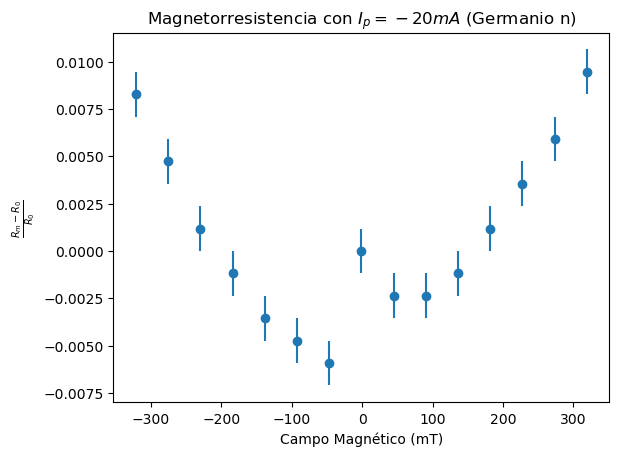

In [4]:
R0 = 0.845/(20/1000)

Rm = Y/(20/1000)
Rm_err = Yerr/(20/1000)

plot1 = ( (Rm-R0)/R0 )
err1 = Rm_err/R0

plt.errorbar(X, plot1, err1, Xerr, fmt='o')
plt.xlabel('Campo Magnético (mT)')
plt.ylabel(r'$\frac{R_m-R_0}{R_0}$')
plt.title('Magnetorresistencia con ' + r'$I_p=-20mA$' + ' (Germanio n)')

plt.savefig('Magnetorresistencia -20mA_n.png', format='png')

Ip = -10mA

In [5]:
Y = data['VL_-10mA (V)']

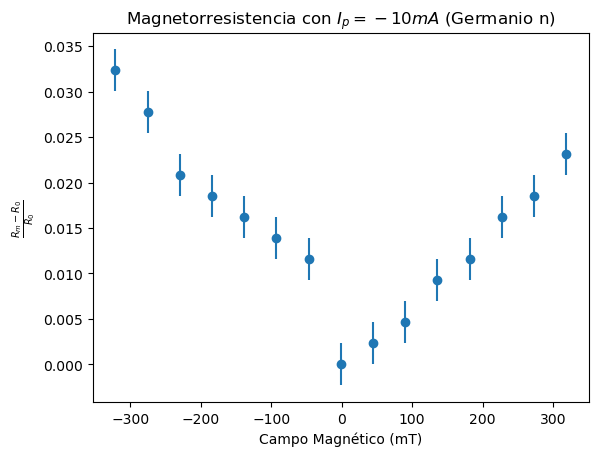

In [6]:
R0 = 0.433/(10/1000)

Rm = Y/(10/1000)
Rm_err = Yerr/(10/1000)

plot2 = ( (Rm-R0)/R0 )
err2 = Rm_err/R0

plt.errorbar(X, plot2, err2, Xerr, fmt='o')
plt.xlabel('Campo Magnético (mT)')
plt.ylabel(r'$\frac{R_m-R_0}{R_0}$')
plt.title('Magnetorresistencia con ' + r'$I_p=-10mA$' + ' (Germanio n)')

plt.savefig('Magnetorresistencia -10mA_n.png', format='png')

Ip = 10mA

In [7]:
Y = data['VL_10mA (V)']

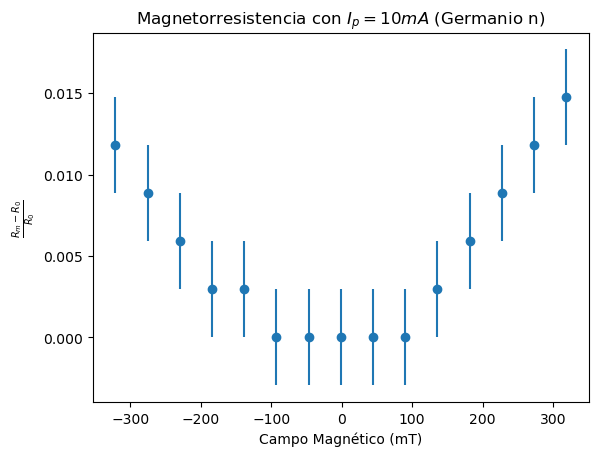

In [8]:
R0 = 0.339/(10/1000)

Rm = Y/(10/1000)
Rm_err = Yerr/(10/1000)

plot3 = ( (Rm-R0)/R0 )
err3 = Rm_err/R0

plt.errorbar(X, plot3, err3, Xerr, fmt='o')
plt.xlabel('Campo Magnético (mT)')
plt.ylabel(r'$\frac{R_m-R_0}{R_0}$')
plt.title('Magnetorresistencia con ' + r'$I_p=10mA$' + ' (Germanio n)')

plt.savefig('Magnetorresistencia 10mA_n.png', format='png')

Ip = 20mA

In [9]:
Y = data['VL_20mA (V)']

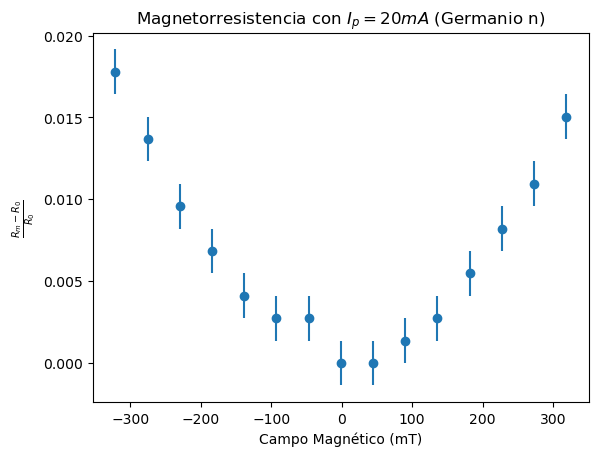

In [10]:
R0 = 0.731/(20/1000)

Rm = Y/(20/1000)
Rm_err = Yerr/(20/1000)

plot4 = ( (Rm-R0)/R0 )
err4 = Rm_err/R0

plt.errorbar(X, plot4, err4, Xerr, fmt='o')
plt.xlabel('Campo Magnético (mT)')
plt.ylabel(r'$\frac{R_m-R_0}{R_0}$')
plt.title('Magnetorresistencia con ' + r'$I_p=20mA$' + ' (Germanio n)')

plt.savefig('Magnetorresistencia 20mA_n.png', format='png')

In [11]:
X_neg = -data['B (mT)'][:7]
X_neg

0    321.16
1    275.45
2    229.74
3    184.03
4    138.32
5     92.61
6     46.90
Name: B (mT), dtype: float64

In [12]:
X_pos = data['B (mT)'][-7:]
X_pos

8      44.52
9      90.23
10    135.94
11    181.65
12    227.36
13    273.07
14    318.78
Name: B (mT), dtype: float64

In [13]:
datos1 = plot1[:7]
datos2 = plot2[-7:]
datos3 = plot3[-7:]
datos4 = plot4[-7:]

In [14]:
def fit(B, a, b, e):
    return a*(B**b) + e

X_test = np.linspace(0, 320, 32001)

In [15]:
popt_1, pcov_1 = curve_fit( fit, X_neg, datos1, sigma=err1[:7], absolute_sigma=True, maxfev = 10000 )

In [16]:
print("a: " + str(popt_1[0]) + " +/- " + str(np.sqrt(pcov_1[0, 0])))
print("b: " + str(popt_1[1]) + " +/- " + str(np.sqrt(pcov_1[1, 1])))
print("e: " + str(popt_1[2]) + " +/- " + str(np.sqrt(pcov_1[2, 2])))

a: 1.823806925393542e-07 +/- 5.366965902775965e-07
b: 1.9551811909679566 +/- 0.5041351144836885
e: -0.0061871717844059265 +/- 0.001242860477200256


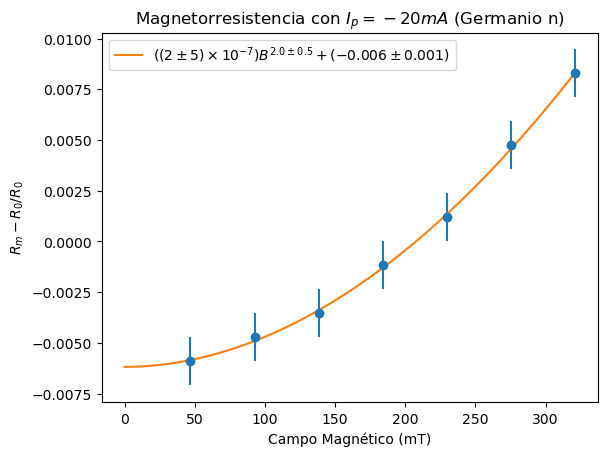

In [17]:
Y_fit1 = fit(X_test, *popt_1)

plt.xlabel("Campo Magnético (mT)")
plt.ylabel(r"$R_m-R_0/R_0$")
plt.title("Magnetorresistencia con " + r'$I_p = -20mA$' + " (Germanio n)")

plt.errorbar(X_neg, datos1, err1[:7], Xerr[:7], fmt='o')
plt.plot(X_test, Y_fit1, label=r'$( (2\pm 5)\times 10^{-7} )B^{2.0\pm 0.5} + (-0.006\pm 0.001)$')
plt.legend(loc='upper left')

plt.savefig('Magnetorresistencia -20mA_n.png', format='png')

In [18]:
popt_2, pcov_2 = curve_fit( fit, X_pos, datos2, sigma=err2[-7:], absolute_sigma=True, maxfev = 10000 )

In [19]:
print("a: " + str(popt_2[0]) + " +/- " + str(np.sqrt(pcov_2[0, 0])))
print("b: " + str(popt_2[1]) + " +/- " + str(np.sqrt(pcov_2[1, 1])))
print("e: " + str(popt_2[2]) + " +/- " + str(np.sqrt(pcov_2[2, 2])))

a: 3.7841654454117675e-05 +/- 0.00011876151014979175
b: 1.114405932879861 +/- 0.5192415267664697
e: -0.0004744068368718915 +/- 0.004799942338598464


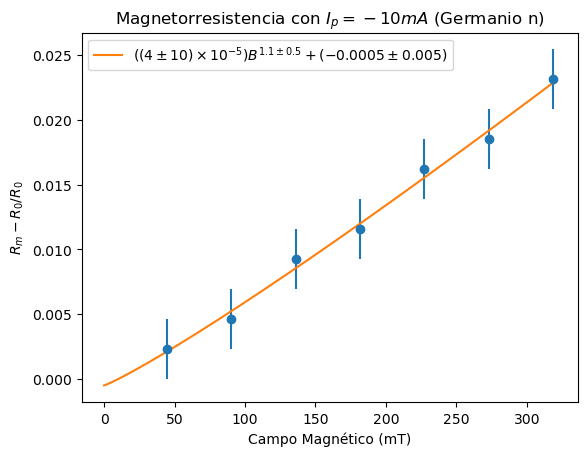

In [20]:
Y_fit2 = fit(X_test, *popt_2)

plt.xlabel("Campo Magnético (mT)")
plt.ylabel(r"$R_m-R_0/R_0$")
plt.title("Magnetorresistencia con " + r'$I_p = -10mA$' + " (Germanio n)")

plt.errorbar(X_pos, datos2, err2[-7:], Xerr[-7:], fmt='o')
plt.plot(X_test, Y_fit2, label=r'$( (4\pm 10)\times 10^{-5} )B^{1.1\pm 0.5} + (-0.0005\pm 0.005)$')
plt.legend(loc='upper left')

plt.savefig('Magnetorresistencia -10mA_n.png', format='png')

In [21]:
popt_3, pcov_3 = curve_fit( fit, X_pos, datos3, sigma=err3[-7:], absolute_sigma=True, maxfev = 10000 )

In [22]:
print("a: " + str(popt_3[0]) + " +/- " + str(np.sqrt(pcov_3[0, 0])))
print("b: " + str(popt_3[1]) + " +/- " + str(np.sqrt(pcov_3[1, 1])))
print("e: " + str(popt_3[2]) + " +/- " + str(np.sqrt(pcov_3[2, 2])))

a: 3.0562839069685844e-06 +/- 1.7577035510287593e-05
b: 1.4918234833348898 +/- 0.9744256048918449
e: -0.0015388255834559818 +/- 0.0040975232399565525


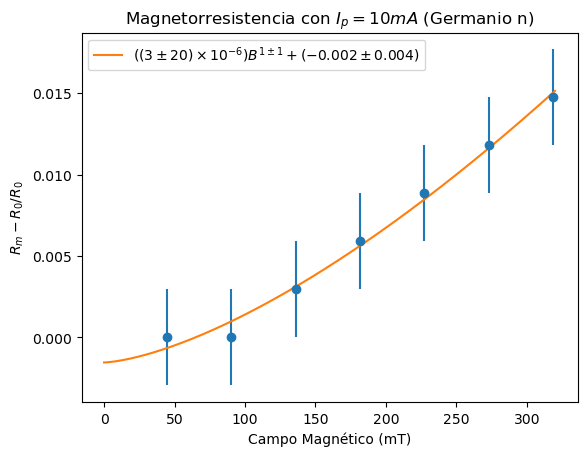

In [23]:
Y_fit3 = fit(X_test, *popt_3)

plt.xlabel("Campo Magnético (mT)")
plt.ylabel(r"$R_m-R_0/R_0$")
plt.title("Magnetorresistencia con " + r'$I_p = 10mA$' + " (Germanio n)")

plt.errorbar(X_pos, datos3, err3[-7:], Xerr[-7:], fmt='o')
plt.plot(X_test, Y_fit3, label=r'$( (3\pm 20)\times 10^{-6} )B^{1\pm 1} + (-0.002\pm 0.004)$')
plt.legend(loc='upper left')

plt.savefig('Magnetorresistencia 10mA_n.png', format='png')

In [24]:
popt_4, pcov_4 = curve_fit( fit, X_pos, datos4, sigma=err4[-7:], absolute_sigma=True, maxfev = 10000 )

In [25]:
print("a: " + str(popt_4[0]) + " +/- " + str(np.sqrt(pcov_4[0, 0])))
print("b: " + str(popt_4[1]) + " +/- " + str(np.sqrt(pcov_4[1, 1])))
print("e: " + str(popt_4[2]) + " +/- " + str(np.sqrt(pcov_4[2, 2])))

a: 6.17581206174054e-07 +/- 1.8699703384811692e-06
b: 1.7558942086994114 +/- 0.5174254688939042
e: -0.00044461239863298853 +/- 0.001573391641800882


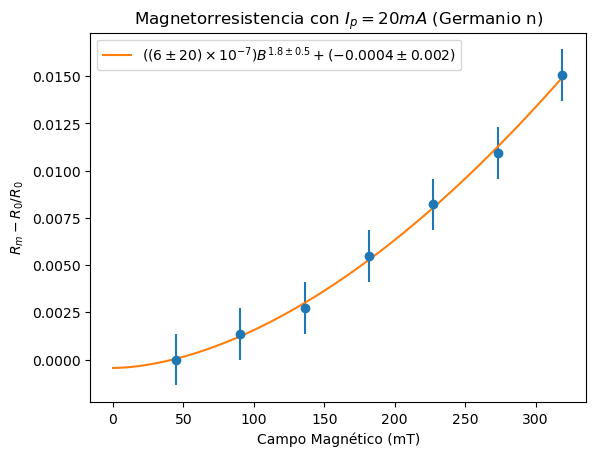

In [27]:
Y_fit4 = fit(X_test, *popt_4)

plt.xlabel("Campo Magnético (mT)")
plt.ylabel(r"$R_m-R_0/R_0$")
plt.title("Magnetorresistencia con " + r'$I_p = 20mA$' + " (Germanio n)")

plt.errorbar(X_pos, datos4, err4[-7:], Xerr[-7:], fmt='o')
plt.plot(X_test, Y_fit4, label=r'$( (6\pm 20)\times 10^{-7} )B^{1.8\pm 0.5} + (-0.0004\pm 0.002)$')
plt.legend(loc='upper left')

plt.savefig('Magnetorresistencia 20mA_n.png', format='png')